# Crime Data Pt 2

In [1]:
pip install jupyter-ai~=1.0 # Because I am using JupyterLab V3, I need to use Jupyter-ai V1.0

  Using cached langchain_core-0.2.41-py3-none-any.whl.metadata (6.2 kB)
Using cached langchain_core-0.2.41-py3-none-any.whl (397 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.10
    Uninstalling langchain-core-0.3.10:
      Successfully uninstalled langchain-core-0.3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-openai 0.2.2 requires langchain-core<0.4.0,>=0.3.9, but you have langchain-core 0.2.41 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [3]:
pip install langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [6]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [7]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [8]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [9]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [9]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2024fall-2-4974/clean_crime_data.csv') # load the data from s3
df.head() #show the top 5 rows

,Vict Age,Crm Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,AREA,TIME OCC
0,41,761,761.0,930.0,997.0,998.0,19,2135
1,34,761,761.0,920.0,930.0,998.0,6,2030
2,59,121,121.0,210.0,910.0,998.0,6,1950
3,43,210,210.0,510.0,910.0,998.0,2,230
4,21,821,230.0,821.0,910.0,998.0,6,2300


In [10]:
%%ai gpt4
what is in the {df} in (In[29])

The given data appears to be a DataFrame with various numerical data. 

- The `Vict Age` column likely represents the age of the victim.
- The `Crm Cd`, `Crm Cd 1`, `Crm Cd 2`, `Crm Cd 3`, and `Crm Cd 4` columns represent different crime codes. These could be codes for different types of crimes or different aspects of a single crime.
- The `AREA` column likely represents a geographic area or jurisdiction where the crime occurred.
- The `TIME OCC` column probably represents the time when the crime occurred.

Here is a brief description of each row:

1. A 41-year-old victim in area 19 faced a crime (code 761) at 21:35. Other crime codes associated with this incident are 930, 997, and 998.
2. A 34-year-old victim in area 6 faced a crime (code 761) at 20:30. Other crime codes associated with this incident are 920, 930, and 998.
3. A 59-year-old victim in area 6 faced a crime (code 121) at 19:50. Other crime codes associated with this incident are 210, 910, and 998.
4. A 43-year-old victim in area 2 faced a crime (code 210) at 02:30. Other crime codes associated with this incident are 510, 910, and 998.
5. A 21-year-old victim in area 6 faced a crime (code 821) at 23:00. Other crime codes associated with this incident are 230, 910, and 998.
6. A 52-year-old victim in area 17 faced a crime (code 122) at 11:50. Other crime codes associated with this incident are 230, 910, and 998.
7. A 15-year-old victim in area 14 faced a crime (code 910) at 21:17. Other crime codes associated with this incident are 812, 860, and 998.
8. A 54-year-old victim in area 17 faced a crime (code 210) at 04:00. Other crime codes associated with this incident are 230, 761, and 998.
9. A victim of unspecified age in area 19 faced a crime (code 210) at 00:01. Other crime codes associated with this incident are 250, 761, and 998.
10. A 16-year-old victim in area 19 faced a crime (code 820) at 11:00. Other crime codes associated with this incident are 761, 910, and 998.

In [22]:
%%ai gpt4 -f code

calculate the most common crime for the age groups of 10 to 20, 20 to 30, 30 to 40, 40 to 50, and 50 to 60, as a pie chart. Do not create a Count dataframe

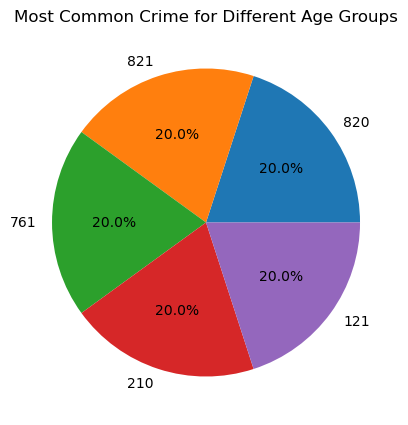

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age groups
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60']
df['age_group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

# Group by age group and crime code, then count the occurrences
crime_counts = df.groupby(['age_group', 'Crm Cd']).size()

# Get the most common crime in each age group
most_common_crimes = crime_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

# Get the counts of the most common crimes
counts = crime_counts.loc[list(zip(most_common_crimes.index, most_common_crimes.values))]

# Plot
plt.figure(figsize=(10,5))
plt.pie(counts, labels=most_common_crimes, autopct='%1.1f%%')
plt.title('Most Common Crime for Different Age Groups')
plt.show()

In [24]:
%%ai gpt4
explain the code in {In[23]}

1. `import pandas as pd`: This line is used to import the Python data analysis library pandas and alias it as `pd`.

2. `import matplotlib.pyplot as plt`: This line is used to import the Python plotting library matplotlib's pyplot module and alias it as `plt`.

3. `bins = [10, 20, 30, 40, 50, 60]`: Here we are defining the age ranges for our age groups.

4. `labels = ['10-20', '20-30', '30-40', '40-50', '50-60']`: These are the labels for the age groups defined above.

5. `df['age_group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)`: This line is used to create a new column in the dataframe `df` called `age_group`. The `pd.cut()` function is used to separate the 'Vict Age' column into bins defined by the `bins` list, and label them using the `labels` list.

6. `crime_counts = df.groupby(['age_group', 'Crm Cd']).size()`: This line groups the dataframe by `age_group` and `Crm Cd` (crime code), and counts the number of occurrences in each group.

7. `most_common_crimes = crime_counts.groupby(level=0).idxmax().apply(lambda x: x[1])`: This line finds the most common crime in each age group. It groups the `crime_counts` series by the first level of the index (age group), finds the index of the maximum value in each group (`idxmax()`), and then applies a function to get the second element of each index (the crime code).

8. `counts = crime_counts.loc[list(zip(most_common_crimes.index, most_common_crimes.values))]`: This line gets the counts of the most common crimes. It uses the `loc` accessor to select the counts from `crime_counts` using a list of tuples, where each tuple is an age group and the most common crime in that age group.

9. `plt.figure(figsize=(10,5))`: This line creates a new figure for plotting with a specified size.

10. `plt.pie(counts, labels=most_common_crimes, autopct='%1.1f%%')`: This line creates a pie chart with the counts of the most common crimes. The labels for the pie slices are the most common crimes, and the `autopct` parameter specifies the format of the percentage labels.

11. `plt.title('Most Common Crime for Different Age Groups')`: This line sets the title of the plot.

12. `plt.show()`: This line displays the plot.

In [43]:
%%ai gpt4 -f code
Calculate number of incidents involving victims under 70 as a scatterplot, include victem age and show the exact crm cd as variables. DO NOT HAVE COUNT AS A variable

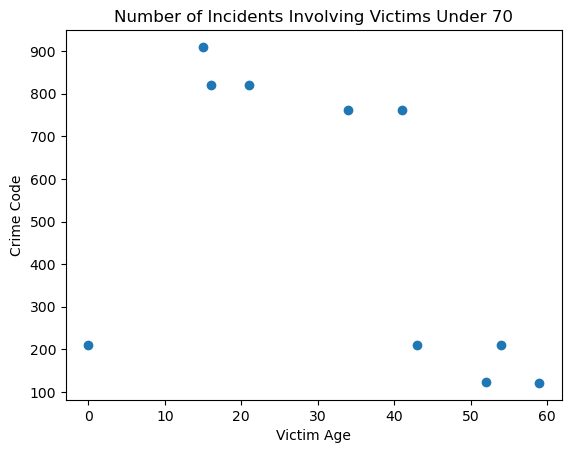

In [44]:
# Filter dataframe for victims under 70
under_70 = df[df['Vict Age'] < 70]

# Plot
plt.scatter(under_70['Vict Age'], under_70['Crm Cd'])
plt.xlabel('Victim Age')
plt.ylabel('Crime Code')
plt.title('Number of Incidents Involving Victims Under 70')
plt.show()

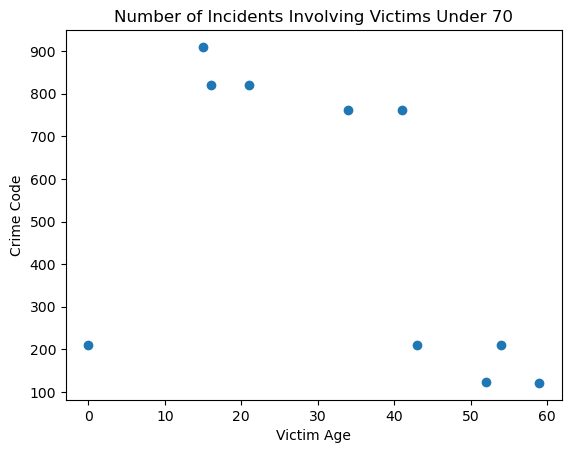

In [40]:
# Filter dataframe for victims under 70
under_70 = df[df['Vict Age'] < 70]

# Plot
plt.scatter(under_70['Vict Age'], under_70['Crm Cd'])
plt.xlabel('Victim Age')
plt.ylabel('Crime Code')
plt.title('Number of Incidents Involving Victims Under 70')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data frame is named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Calculate the year-over-year income growth rate
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Group by 'name' and calculate the average income growth rate
df_grouped = df.groupby('name')['income_growth_rate'].mean().reset_index()

# Plot the average income growth rate for each state
plt.bar(df_grouped['name'], df_grouped['income_growth_rate'])
plt.xlabel('State')
plt.ylabel('Average Income Growth Rate')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.xticks(rotation=90)
plt.show()
```
This code assumes that the data for each state and each year is available and sorted correctly. If not, you may need to preprocess the data before calculating the growth rate and plotting.

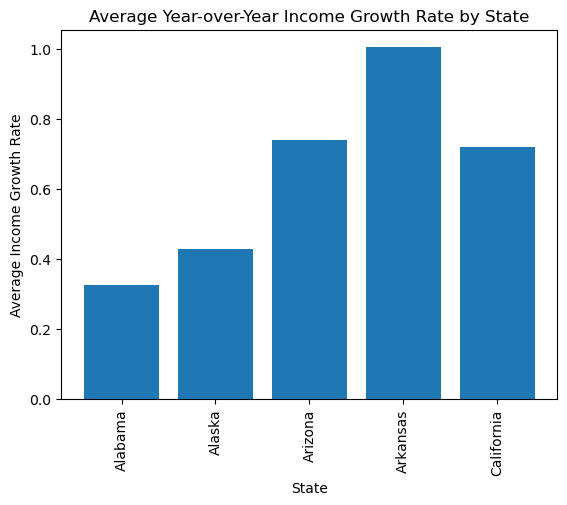

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data frame is named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Calculate the year-over-year income growth rate
df['income_growth_rate'] = df.groupby('name')['income'].pct_change()

# Group by 'name' and calculate the average income growth rate
df_grouped = df.groupby('name')['income_growth_rate'].mean().reset_index()

# Plot the average income growth rate for each state
plt.bar(df_grouped['name'], df_grouped['income_growth_rate'])
plt.xlabel('State')
plt.ylabel('Average Income Growth Rate')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.xticks(rotation=90)
plt.show()

In [19]:
%%ai gpt4 -f code
We have a view named name_income in an SQL database
you don't need to redefine the connection string
use the {conn} defined in {In[3]} to load all the recored into pandas dataframe 

In [21]:
%%ai gpt4 -f code
We have a view named name_income in an SQL database
you don't need to redefine the connection string
use the {conn} defined in {In[6]} to load all the recored into pandas dataframe 

In [22]:
import pandas as pd
import psycopg2

query = "SELECT * FROM name_income"
df = pd.read_sql(query, conn)

In [23]:
%%ai gpt4 
What is the information in {df}

The given data is a DataFrame with 780 rows and 2 columns. Each row represents a record. The 'name' column contains the names of various regions, which appear to be US states, and the 'income' column contains the corresponding income for each region. 

The DataFrame includes data for regions such as Alabama, Alaska, Arizona, Arkansas, and California, among others. The 'income' values vary widely: for example, the income for Alabama is 36,879, while the income for the District of Columbia is 92,266.

In [24]:
%%ai gpt4 -f code
Calculate the average year-over-year income growth rate for each state in {df} 
and create a chart to show the result

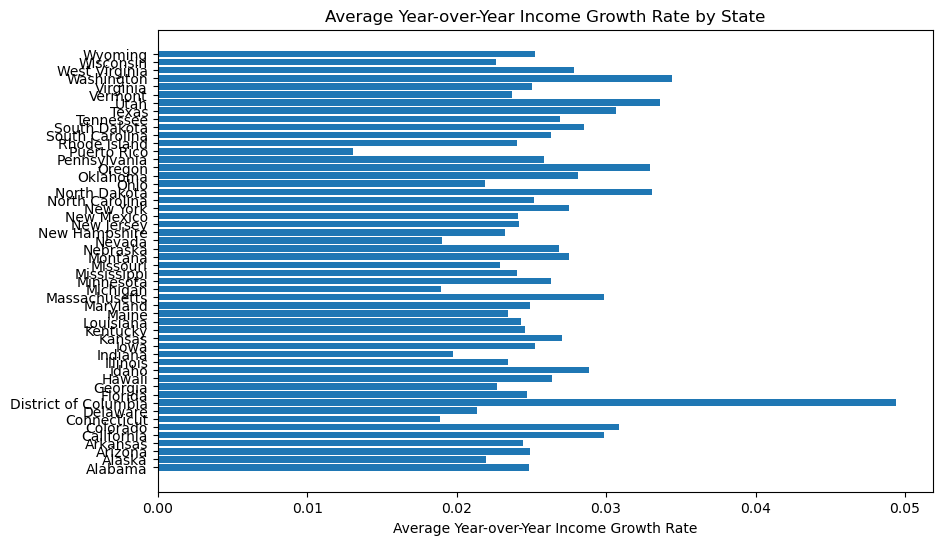

In [25]:
import matplotlib.pyplot as plt

# Assuming that the data is sorted by year and the same state appears in each year
df['income_shift'] = df.groupby(['name'])['income'].shift(1)
df['growth_rate'] = (df['income'] - df['income_shift']) / df['income_shift']

# Calculate average growth rate for each state
avg_growth_rate = df.groupby('name')['growth_rate'].mean().reset_index()

# Create a bar chart to show the result
plt.figure(figsize=(10,6))
plt.barh(avg_growth_rate['name'], avg_growth_rate['growth_rate'])
plt.xlabel('Average Year-over-Year Income Growth Rate')
plt.title('Average Year-over-Year Income Growth Rate by State')
plt.show()

In [26]:
cur.close()
conn.close()